In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/car_evaluation.csv")

In [ ]:
del data['2']

In [ ]:
data.head()

,vhigh,vhigh.1,2.1,small,low,unacc
0,vhigh,vhigh,2,small,med,unacc
1,vhigh,vhigh,2,small,high,unacc
2,vhigh,vhigh,2,med,low,unacc
3,vhigh,vhigh,2,med,med,unacc
4,vhigh,vhigh,2,med,high,unacc


In [ ]:
data.tail()

,vhigh,vhigh.1,small,low,unacc
1722,low,low,med,med,good
1723,low,low,med,high,vgood
1724,low,low,big,low,unacc
1725,low,low,big,med,good
1726,low,low,big,high,vgood


In [ ]:
data['vhigh'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
data['vhigh.1'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
out = {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}

In [ ]:
data['vhigh'] = data['vhigh'].map(lambda x: out[x])

In [ ]:
data.tail()

,vhigh,vhigh.1,small,low,unacc
1722,3,low,med,med,good
1723,3,low,med,high,vgood
1724,3,low,big,low,unacc
1725,3,low,big,med,good
1726,3,low,big,high,vgood


In [ ]:
data['vhigh.1'] = data['vhigh.1'].map(lambda x: out[x])

In [ ]:
data['unacc'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
out1 = {'small':0, 'med':1, 'big':2}

In [ ]:
data['small'] = data['small'].map(lambda x: out1[x])

In [ ]:
out1 = {'med':0, 'high':1, 'low':2}

In [ ]:
data['low'] = data['low'].map(lambda x: out1[x])

In [ ]:
out2 ={'unacc':0, 'acc':1, 'vgood':2, 'good':3}

In [ ]:
data['unacc'] = data['unacc'].map(lambda x : out2[x])

In [ ]:
data.head()

,vhigh,vhigh.1,small,low,unacc
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,2,0
3,0,0,1,0,0
4,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:,0:4]

In [ ]:
X

,vhigh,vhigh.1,small,low
0,0,0,0,0
1,0,0,0,1
2,0,0,1,2
3,0,0,1,0
4,0,0,1,1
...,...,...,...,...
1722,3,3,1,0
1723,3,3,1,1
1724,3,3,2,2
1725,3,3,2,0


In [ ]:
y = data.iloc[:,4]

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1722    3
1723    2
1724    0
1725    3
1726    2
Name: unacc, Length: 1727, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
final_model = model.fit(X,y)

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

[Text(0.3773148148148148, 0.9444444444444444, 'X[3] <= 1.5\ngini = 0.457\nsamples = 1727\nvalue = [1209, 384, 65, 69]'), Text(0.3699074074074074, 0.8333333333333334, 'X[0] <= 1.5\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 65, 69]'), Text(0.09444444444444444, 0.7222222222222222, 'X[1] <= 1.5\ngini = 0.43\nsamples = 576\nvalue = [396, 180, 0, 0]'), Text(0.018518518518518517, 0.6111111111111112, 'X[1] <= 0.5\ngini = 0.219\nsamples = 288\nvalue = [252, 36, 0, 0]'), Text(0.011111111111111112, 0.5, 'gini = 0.0\nsamples = 144\nvalue = [144, 0, 0, 0]'), Text(0.025925925925925925, 0.5, 'X[0] <= 0.5\ngini = 0.375\nsamples = 144\nvalue = [108, 36, 0, 0]'), Text(0.018518518518518517, 0.3888888888888889, 'gini = 0.0\nsamples = 72\nvalue = [72, 0, 0, 0]'), Text(0.03333333333333333, 0.3888888888888889, 'X[2] <= 0.5\ngini = 0.5\nsamples = 72\nvalue = [36, 36, 0, 0]'), Text(0.014814814814814815, 0.2777777777777778, 'X[3] <= 0.5\ngini = 0.413\nsamples = 24\nvalue = [17, 7, 0, 0]'), Text(0.0074074

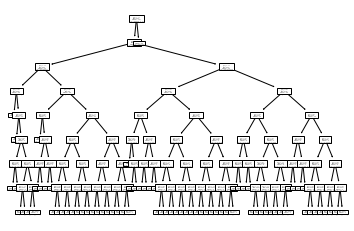

In [ ]:
plt.figure(figsize=(6,4))
print(tree.plot_tree(final_model))

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
feature_names = ['vhigh', 'vhigh.1', 'small', 'low']
out = ['Yes','NO','m','j']

dot = export_graphviz(decision_tree= final_model,out_file = "golf.dot",feature_names= feature_names,class_names=out)

In [ ]:
data.columns

Index(['vhigh', 'vhigh.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
! dot -T png golf.dot -o tree.png